In [1]:
import json
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import nltk

json1_file = open('data.json')
json1_str = json1_file.read()
text = json.loads(json1_str)

In [2]:
sentences = []
for i, t in enumerate(text):
    sentences.append(sent_tokenize(text[i]['msg']))
# How many sentences are in this news article?
print (len(sentences))

43001


In [3]:
words = []

tokenizer = RegexpTokenizer(r'\w+')

for s in sentences:
    words.append(tokenizer.tokenize(str(s)))

# How many words are in this news article?
print (len(words))

43001


In [4]:
stop_words = stopwords.words('english')
stop_words.append('https')
stop_words.append('image')
stop_words.append('uni')
stop_words.append('gpa')
stop_words.append('apply')
stop_words.append('ntu')
stop_words.append('smu')
stop_words.append('applied')
stop_words.append('nus')
stop_words.append('hi')
stop_words.append('1')
stop_words.append('2')
stop_words.append('3')
stop_words.append('wrote')
stop_words.append('u')
stop_words.append('also')
stop_words.append('would')
stop_words.append('yet')
stop_words.append('anyone')
stop_words.append('5')
stop_words.append('one')
stop_words.append('may')
stop_words.append('using')
stop_words.append('thanks')
stop_words.append('sure')
stop_words.append('years')
stop_words.append('4')
stop_words.append('want')
stop_words.append('went')
stop_words.append('need')
stop_words.append('since')
stop_words.append('school')
stop_words.append('good')
stop_words.append('even')
stop_words.append('courses')
stop_words.append('much')
stop_words.append('already')
stop_words.append('really')
stop_words.append('next')
stop_words.append('guys')
stop_words.append('see')
stop_words.append('level')
stop_words.append('take')
stop_words.append('time')
stop_words.append('people')
stop_words.append('rp')
stop_words.append('ur')
stop_words.append('though')
stop_words.append('haha')
stop_words.append('right')
stop_words.append('student')
stop_words.append('yeah')
stop_words.append('hahaha')
stop_words.append('e')
stop_words.append('hardwarezone')
stop_words.append('forums')
stop_words.append('com')
stop_words.append('corn')
stop_words.append('oneplus')
stop_words.append('A6000')
stop_words.append('pcwx')
stop_words.append('sent')
stop_words.append('redmi')
stop_words.append('app')
stop_words.append('samsung')
stop_words.append('sm')
stop_words.append('n920i')
stop_words.append('xiaomi')
stop_words.append('note')
stop_words.append('gagt')
stop_words.append('www')
stop_words.append('edu')
stop_words.append('http')
stop_words.append('sg')

In [5]:
words_filtered = []

for w in words:
    for i in w:
        if i.lower() not in stop_words:
            words_filtered.append(i)

# After removing stop words, how many words remain?
print (len(words_filtered))

1049607


In [36]:
fdist = FreqDist(words_filtered)
print(fdist)

<FreqDist with 27637 samples and 1049607 outcomes>


In [37]:
fdist.most_common(50)

[('interview', 13997),
 ('got', 11773),
 ('get', 9118),
 ('offer', 8636),
 ('course', 8462),
 ('still', 7668),
 ('appeal', 7598),
 ('year', 7510),
 ('know', 7267),
 ('think', 6249),
 ('like', 6207),
 ('first', 5529),
 ('choice', 5407),
 ('go', 4815),
 ('received', 4760),
 ('application', 4638),
 ('rejected', 4459),
 ('poly', 4367),
 ('accepted', 3862),
 ('well', 3769),
 ('chance', 3686),
 ('offered', 3644),
 ('email', 3494),
 ('last', 3478),
 ('waiting', 3280),
 ('students', 3115),
 ('DA', 2990),
 ('going', 2934),
 ('results', 2933),
 ('news', 2772),
 ('receive', 2670),
 ('ask', 2650),
 ('friend', 2522),
 ('admission', 2491),
 ('biz', 2417),
 ('engineering', 2348),
 ('hope', 2344),
 ('business', 2338),
 ('FASS', 2326),
 ('best', 2317),
 ('offers', 2317),
 ('accept', 2287),
 ('quite', 2244),
 ('getting', 2218),
 ('acceptance', 2154),
 ('science', 2142),
 ('chances', 2122),
 ('better', 2028),
 ('say', 2004),
 ('reply', 1987)]

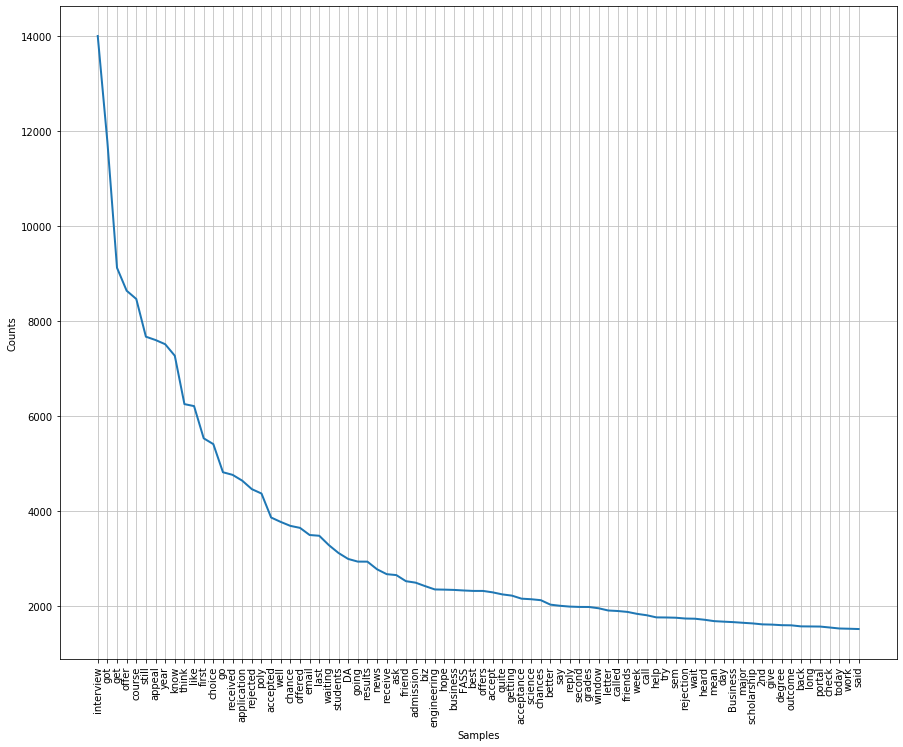

In [38]:
plt.figure(figsize=(15,12))
fdist.plot(80,cumulative=False)
plt.show()

In [30]:
bigrams = nltk.bigrams(words_filtered)
bfd = nltk.FreqDist(bigrams)
print(bfd)

<FreqDist with 389566 samples and 1049606 outcomes>


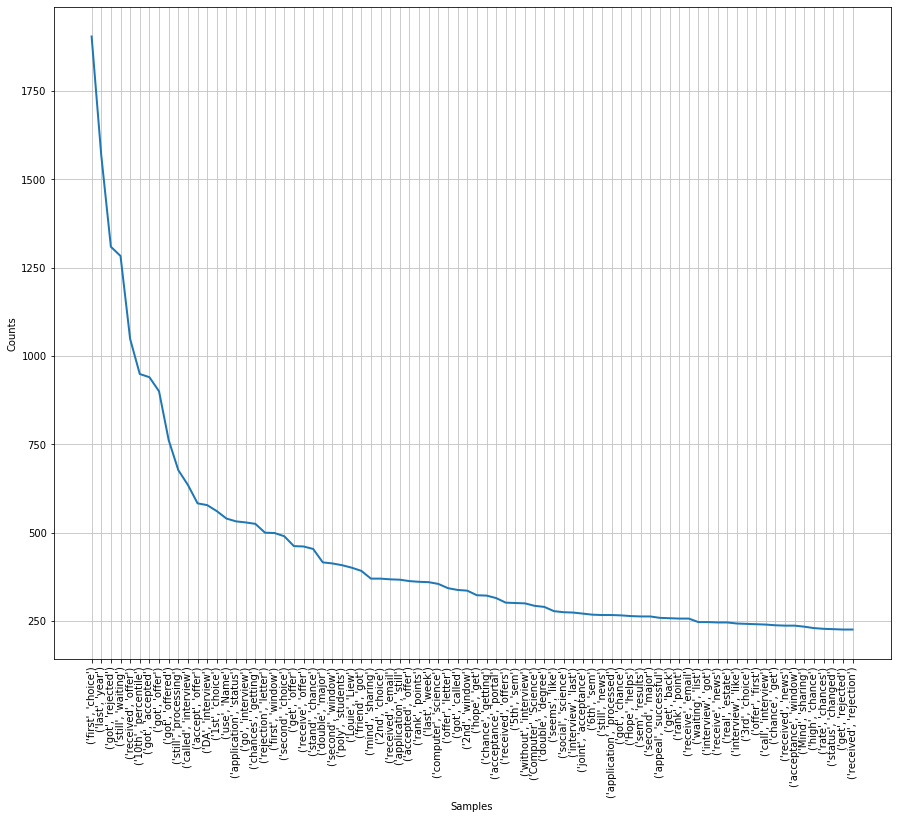

In [31]:
plt.figure(figsize=(15,12))
bfd.plot(80,cumulative=False)
plt.show()

In [32]:
trigrams = nltk.trigrams(words_filtered)
tfd = nltk.FreqDist(trigrams)
print(tfd)

<FreqDist with 595394 samples and 1049605 outcomes>


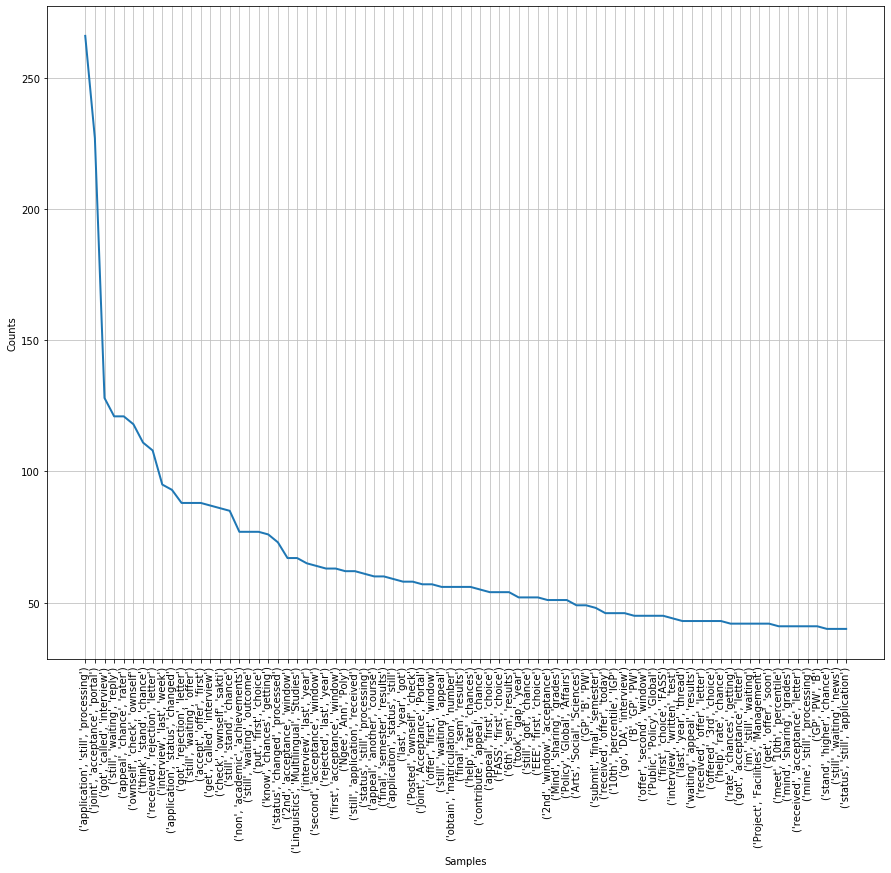

In [33]:
plt.figure(figsize=(15,12))
tfd.plot(80,cumulative=False)
plt.show()

In [6]:
############### Section 6 ###############
# Let's create a Porter Stemmer object.
porter_stemmer = PorterStemmer()

# Let's test out this stemmer.
some_words = ["SMU", "Admission", "acceptance"]
for w in some_words:
    print (porter_stemmer.stem(w))

# Let's stem all the words in our news article.
words_filtered_stemmed = []
for w in words_filtered:
    words_filtered_stemmed.append(porter_stemmer.stem(w))

print (len(words_filtered_stemmed))

smu
admiss
accept
1049607


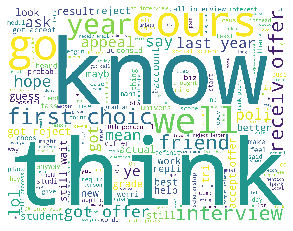

In [7]:
############### Section 7 ###############
# Word Cloud takes a string. Convert our list of words into a string.
words_joined = " ".join([w for w in words_filtered_stemmed])

# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                         width=1800,
                         height=1400).generate(words_joined)
# plt.savefig('virusWordCloud.png', dpi=300)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
my_wordcloud.to_file('textWordCloud.png')